#### SVM(Support Vector Machine) 2

#### import library

In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


#### 데이터셋 생성, iris 데이터셋 사용

In [ ]:
iris = datasets.load_iris()

X = iris.data[:, :2]   # 꽃잎 길이, 폭  만 사용
y = iris.target

 # sklearn에서 제공하는 model_selection  패키지에서 제공하는 train_test_split() 메서드를 활용
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

#X_train.shape
#X_test.shape
#y_train.shape
y_test.shape


(45,)

#### SVM 모델 생성 및 학습 (RBF 커널 사용 - 다중)

In [ ]:
model = svm.SVC(kernel='rbf', gamma='scale' )       # kernel = 'linear' : 선형 커널을 사용하여 데이터를 분류,  3D= 'RBF'

model.fit(X_train, y_train)                         # 훈련 데이터를 사용하여 svm 분류기를 훈련


SVC()

In [ ]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

print(y_pred)

[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 2 0 0 1 2
 0 0 0 1 2 2 0 0]


#### 모델 성능 평가

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred) )
print("classification_report : \n", classification_report(y_test, y_pred))


Accuracy :  0.8
classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



#### 학습 데이터와 Decision boundary Visualization(결정 경계 시각화 )

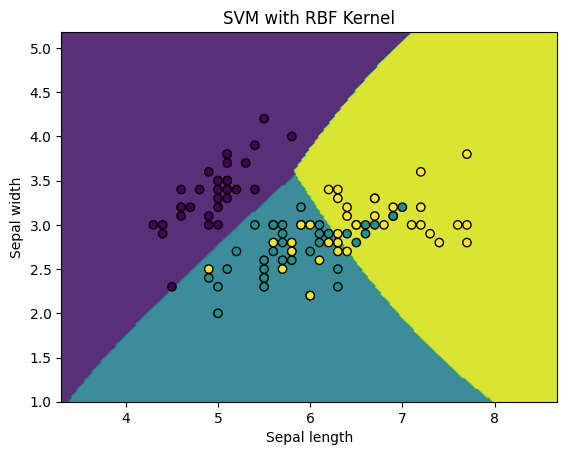

In [ ]:
def plot_decision_boundary(X, y, model):
  h = 0.02              # 결정경계의 해상도
  x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
  y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.9)
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title('SVM with RBF Kernel')
  plt.show()


# 결정경계 시각화
plot_decision_boundary(X_train, y_train, model)
